# Get started with ClickHouse

ClickHouse is an column-oriented SQL database management system for for online analytical processing (OLAP). In this tutorial you will:
1. Configure some Python packages for the database connection and data analysis/visualization
2. Connect to a sample ClickHouse system
4. Query a public dataset of home prices in the United Kingdom
5. Generate a chart using the home price data 

### 1. Configure some Python packages
   - `clickhouse_connect` is a database driver for connecting ClickHouse to Python. It is also used to connect to Superset and Pandas.
   - `pandas` is a data analysis toolkit for Python.
   - `matpotlib` is a library for creating static and interactive visualiztions in Python.

In [1]:
import sys
!{sys.executable} -m pip install clickhouse_connect

In [2]:
!{sys.executable} -m pip install pandas
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

### 2. Connect to ClickHouse
The ClickHouse system used in this tutorial is a public read-only system. Because it is publicly available the connection details are configured directly in this notebook. When using your own system you should configure the connection based on your security needs. At a minimum you should use a `.env` file. More information about this and other topics is linked at the end, but we suggest that you follow the tutorial first and then read more.

The connection details are host, port, username, andpassword. `clickhouse-connect` has more optional parameters to tune the connection, but the defaults are fine for the `play.clickhouse.com` system.

In [4]:
ch_host = "play.clickhouse.com"
ch_port = 443
ch_username = "play"
ch_password = ""

In [5]:
import clickhouse_connect
client = clickhouse_connect.get_client(
    host=ch_host, 
    port=ch_port,
    secure='true',
    username=ch_username, 
    password=ch_password)

### 3. Query a public dataset

In [6]:
uk_prices = """select price, locality, town, county from default.uk_price_paid ORDER BY price DESC LIMIT 20"""
result = client.query(uk_prices)
df = pd.DataFrame(result.result_set,
                  columns=['price', 
                     'locality', 
                     'town', 
                     'county'])
df.style.hide(axis='index')


price,locality,town,county
900000000,,ASHFORD,KENT
594300000,,LONDON,GREATER LONDON
569200000,,LONDON,GREATER LONDON
542540820,,LONDON,GREATER LONDON
523000000,,LONDON,GREATER LONDON
494400000,METHLEY,LEEDS,WEST YORKSHIRE
494400000,METHLEY,LEEDS,WEST YORKSHIRE
480000000,,WOLVERHAMPTON,WEST MIDLANDS
480000000,,WOLVERHAMPTON,WEST MIDLANDS
480000000,,WOLVERHAMPTON,WEST MIDLANDS


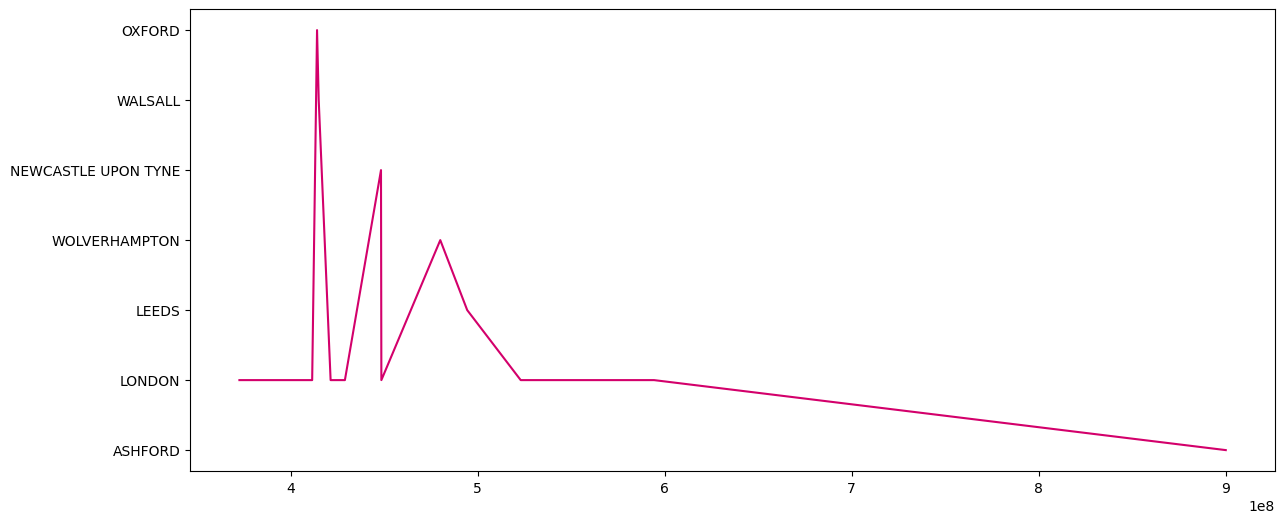

In [8]:
plt.rcParams["figure.figsize"] = (14,6)
#define colors to use
col1 = '#D3006B'
col2 = 'red'

#define subplots
fig,ax = plt.subplots()
ax.plot(df.price, df.town, color=col1)

## Further reading
- [`python-dotenv`](https://pypi.org/project/python-dotenv/) for storing credentials in a `.env` file
- clickhouse-connect
- pandas
- matplotlib
- UK Price Paid data
- dataframes